Examples of the pandas dataframe application
=====




Chapter 1
======
***

Introduction
------
  

The topic was inspired by reading the Chapter6 of the [*Programming-and-Bayesian-Methods-for-Hackers*](http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter6_Priorities/Chapter6.ipynb) and [*a hierarchical Bayesian Model of the PL*](http://danielweitzenfeld.github.io/passtheroc/blog/2014/10/28/bayes-premier-league/)


In [2]:
import sys

sys.path = ['/usr/local/lib/python2.7/dist-packages'] + sys.path # to fix the problem with numpy: this replaces  1.6 version by 1.9

%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import os

figsize(12.5, 3)

Now, we are gonna to read some data and play with them

In [25]:
data_file = os.path.join(os.getcwd(), 'data/')+'results_2014.csv'

# we can use the first column as the index...
#df = pd.read_csv(data_file, sep=',',index_col=0)

df = pd.read_csv(data_file, sep=',')
df

home_team away_team  home_score  away_score
0      Wales     Italy          23          15
1     France   England          26          24
2    Ireland  Scotland          28           6
3    Ireland     Wales          26           3
4   Scotland   England           0          20
5     France     Italy          30          10
6      Wales    France          27           6
7      Italy  Scotland          20          21
8    England   Ireland          13          10
9    Ireland     Italy          46           7
10  Scotland    France          17          19
11   England     Wales          29          18
12     Italy   England          11          52
13     Wales  Scotland          51           3
14    France   Ireland          20          22

>Much better, but still not done. We need an easy way to refer to the teams. Let's create a lookup table, which maps team name to a unique integer i.

In [6]:
teams = df.home_team.unique()
teams = pd.DataFrame(teams,columns=['team'])
teams['id']=teams.index # id aka i
teams

team  id
0     Wales   0
1    France   1
2   Ireland   2
3  Scotland   3
4     Italy   4
5   England   5

There are a few very important operations on dataframes: *join and merge*.
Please, refer your self to documentation on types of the merge (joint)
[wiki](http://en.wikipedia.org/wiki/Join_%28SQL%29). Also it is worth to know the syntax of these commands in *pandas*: 

http://pandas.pydata.org/pandas-docs/stable/merging.html (# it is quite informative)


http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-merge

http://www.w3schools.com/sql/sql_join.asp


*Join* operates like *merge* but it modifies the *caller* datataframe.

In [26]:
# here what we want to do: 
# join 'teams' and 'df', rename 'id' to 'id_x', where 'x' is either 'home' or 'away'
# drop a column 'team'

# process 'home' teams
df=pd.merge(df,teams, left_on = 'home_team', right_on='team', how='left') # join
df=df.rename(columns={'id':'id_home'}) # rename
df=df.drop('team',1) # remame

# process 'away' teams
df=pd.merge(df,teams, left_on = 'away_team', right_on='team', how='left') # join
df=df.rename(columns={'id':'id_away'}) # rename
df=df.drop('team',1) # remame


df

home_team away_team  home_score  away_score  id_home  id_away
0      Wales     Italy          23          15        0        4
1     France   England          26          24        1        5
2    Ireland  Scotland          28           6        2        3
3    Ireland     Wales          26           3        2        0
4   Scotland   England           0          20        3        5
5     France     Italy          30          10        1        4
6      Wales    France          27           6        0        1
7      Italy  Scotland          20          21        4        3
8    England   Ireland          13          10        5        2
9    Ireland     Italy          46           7        2        4
10  Scotland    France          17          19        3        1
11   England     Wales          29          18        5        0
12     Italy   England          11          52        4        5
13     Wales  Scotland          51           3        0        3
14    France   Ireland          20          22        1        2

It is also useful to understand the paradigma of the *Groupby* in the pandas: 
this method allows to split data in blocks (aka *mapping*), to aggregate algorithms to the blocks ( aka making *statistics*), to generate new data ( aka *transformation*) and finally to filter data. See man pages of the pandas:

http://pandas.pydata.org/pandas-docs/stable/groupby.html

Let's get some statistics on produced numbers in the dataframe:

In [29]:
g=df.groupby('id_home')
g.groups

{0: [0L, 6L, 13L],
 1: [1L, 5L, 14L],
 2: [2L, 3L, 9L],
 3: [4L, 10L],
 4: [7L, 12L],
 5: [8L, 11L]}

In [31]:
print g.home_score.mean()
print g.home_score.std()

print g.away_score.mean()
print g.away_score.std()

id_home
0          33.666667
1          25.333333
2          33.333333
3           8.500000
4          15.500000
5          21.000000
Name: home_score, dtype: float64
id_home
0          15.143756
1           5.033223
2          11.015141
3          12.020815
4           6.363961
5          11.313708
Name: home_score, dtype: float64
id_home
0           8.000000
1          18.666667
2           5.333333
3          19.500000
4          36.500000
5          14.000000
Name: away_score, dtype: float64
id_home
0           6.244998
1           7.571878
2           2.081666
3           0.707107
4          21.920310
5           5.656854
Name: away_score, dtype: float64


To have a nice presentation of the grouped data, usually we can use *Pivot tables*.
A nice example of the pivot table application is given in the post

http://wesmckinney.com/blog/fast-and-easy-pivot-tables-in-pandas-0-5-0/

http://pandas.pydata.org/pandas-docs/stable/reshaping.html

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html


In [75]:
#table = pd.pivot_table(df,values=['home_score','away_score'],columns=['home_team','away_team'],aggfunc='mean')
table = pd.pivot_table(df,values=['home_score','away_score'],columns=['home_team'],aggfunc='mean')
table

home_team   England     France    Ireland  Italy  Scotland      Wales
away_score       14  18.666667   5.333333   36.5      19.5   8.000000
home_score       21  25.333333  33.333333   15.5       8.5  33.666667

And finally, we can plot agreggated data:

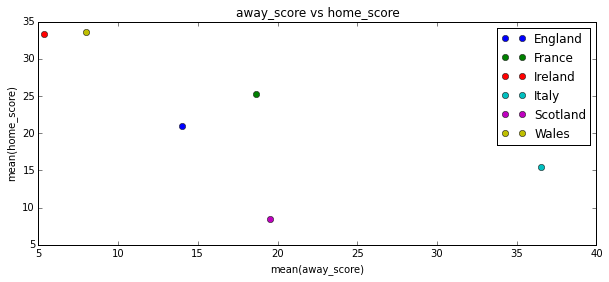

In [76]:

fig, axs = plt.subplots(figsize=(10,4))
[ plt.plot(table.ix[0,i],table.ix[1,i],'o',
           label=label) for i, label in enumerate(table.columns.values.tolist())]
plt.legend()
axs.set_title('away_score vs home_score')
axs.set_xlabel('mean(away_score)')
axs.set_ylabel('mean(home_score)')


In [73]:
from IPython.core.display import HTML


def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()